<h1>Prediction of car price using an Automobile dataset from ibm</h1>

<h3>Data Source</h3>
<p>
You can find the "Automobile Dataset" from the following link: <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01">https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data</a>
</p>


<h3>Importing our dataset</h3>

In [2]:
#first, we import the necesary modules
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [3]:
datasource = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

Data = pd.read_csv(datasource)

In [4]:
Data.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


<h5>As seen, our data looks so unreadable, the next step is to make the data readable and meaningful by applying data wrangling</h5>

In [5]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
Data = pd.read_csv(datasource, names = headers)
Data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<p>Replacing missing data <b>?</b> with <b><i>NAN</b></i></p>

In [6]:
Data.replace('?', np.nan, inplace = True)
Data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [7]:
#detecting/evaluating for missing data in our dataframe

missing_data = Data.isnull()
missing_data.head()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print(" ")

symboling
False    205
Name: symboling, dtype: int64
 
normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64
 
make
False    205
Name: make, dtype: int64
 
fuel-type
False    205
Name: fuel-type, dtype: int64
 
aspiration
False    205
Name: aspiration, dtype: int64
 
num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64
 
body-style
False    205
Name: body-style, dtype: int64
 
drive-wheels
False    205
Name: drive-wheels, dtype: int64
 
engine-location
False    205
Name: engine-location, dtype: int64
 
wheel-base
False    205
Name: wheel-base, dtype: int64
 
length
False    205
Name: length, dtype: int64
 
width
False    205
Name: width, dtype: int64
 
height
False    205
Name: height, dtype: int64
 
curb-weight
False    205
Name: curb-weight, dtype: int64
 
engine-type
False    205
Name: engine-type, dtype: int64
 
num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64
 
engine-size
False    205
Name: engine-size, dtype: int64

<p> Based on the missing values for each column, we either drop the data or replace it<p>

In [8]:
#Replacing certain columns by mean

avg_normalized_loss = Data["normalized-losses"].astype("float").mean(axis = 0)
Data["normalized-losses"].replace(np.nan, avg_normalized_loss, inplace = True)
avg_bore=Data['bore'].astype('float').mean(axis=0)
Data["bore"].replace(np.nan, avg_bore, inplace=True)
avg_stroke = Data["stroke"].astype("float").mean(axis = 0)
Data["stroke"].replace(np.nan, avg_stroke, inplace = True)
avg_horsepower = Data['horsepower'].astype('float').mean(axis=0)
Data['horsepower'].replace(np.nan, avg_horsepower, inplace=True)
avg_peakrpm=Data['peak-rpm'].astype('float').mean(axis=0)
Data['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

In [9]:
# Replace Number_of_doors by frequency

x = Data["num-of-doors"].value_counts()
max = x.idxmax()

Data["num-of-doors"].replace(np.nan, max, inplace = True)


In [10]:
#dropping all rows with NAN in price column

Data.dropna(subset = ["price"], axis =0, inplace = True)
Data.reset_index(drop = True, inplace = True)
Data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

<h3><i>Lastly, we need to ensure all our Data is in correct format</i></h3>

In [11]:
Data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [12]:
Data[["bore", "stroke"]] = Data[["bore", "stroke"]].astype("float")
Data[["normalized-losses"]] = Data[["normalized-losses"]].astype("int")
Data[["price"]] = Data[["price"]].astype("float")
Data[["peak-rpm"]] = Data[["peak-rpm"]].astype("float")

our data is successfully cleaned!!!

In [13]:
#converting mpg to l/100km
Data['city-L/100km'] = 235/Data["city-mpg"]
Data['highway-L/100km'] = 235/Data["highway-mpg"]
Data.rename(columns={'"highway-mpg"':'highway-L/100km'}, inplace=True)


In [14]:
#scaling the length,width and height
Data['length'] = Data['length']/Data['length'].max()
Data['width'] = Data['width']/Data['width'].max()
Data['height'] = Data['height']/Data['height'].max()
Data[["horsepower"]]

,horsepower
0,111
1,111
2,154
3,102
4,115
...,...
196,114
197,160
198,134
199,106


Text(0.5, 1.0, 'avg_horsepower')

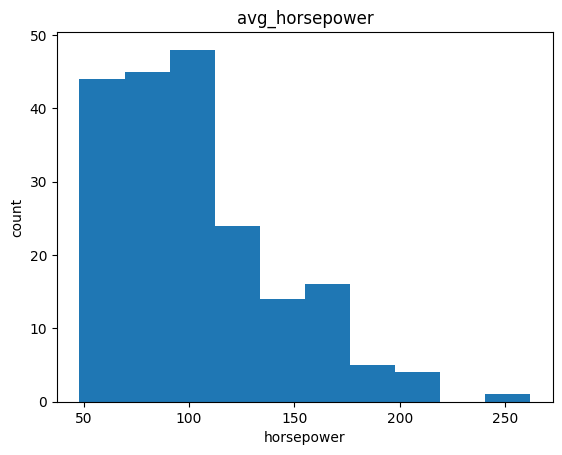

In [18]:

#grouping horsepower into bins
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(Data["horsepower"])
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("avg_horsepower")

In [24]:
Data["horsepower"]=Data["horsepower"].astype(int, copy=True,)
max_data = Data["horsepower"].max()
min_data = Data["horsepower"].min()

In [25]:
bins = np.linspace(min_data, max_data, 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [29]:
group_names = ["low","medium","high"]
Data["horsepower-binned"] = pd.cut(Data["horsepower"], bins = bins, labels = group_names, include_lowest = True)
Data[["horsepower", "horsepower-binned"]].head()


,horsepower,horsepower-binned
0,111,low
1,111,low
2,154,medium
3,102,low
4,115,low


In [30]:
Data["horsepower-binned"].value_counts

<bound method IndexOpsMixin.value_counts of 0         low
1         low
2      medium
3         low
4         low
        ...  
196       low
197    medium
198    medium
199       low
200       low
Name: horsepower-binned, Length: 201, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']>

Text(0.5, 1.0, 'horsepower bins')

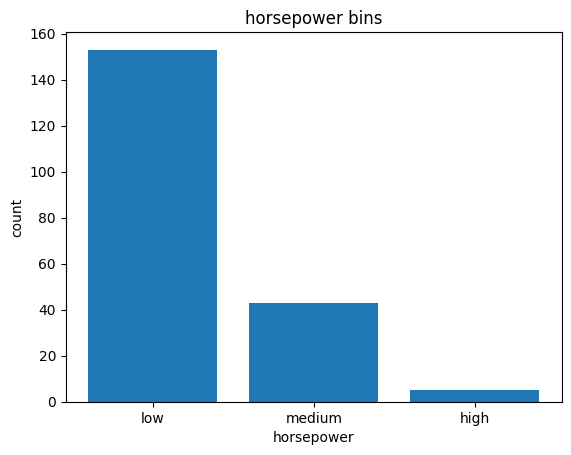

In [31]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, Data["horsepower-binned"].value_counts())

plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Text(0.5, 1.0, 'horsepower bins')

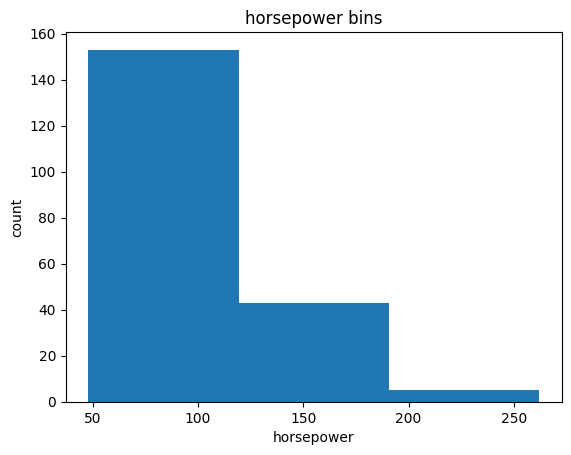

In [32]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(Data["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [33]:
#setting the fuel-type column to dummy_variables for regression analysis purpose
dummy_variable = pd.get_dummies(Data["fuel-type"])

dummy_variable.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [34]:
Data = pd.concat([Data, dummy_variable], axis = 1)

Data.drop("fuel-type", axis = 1, inplace = True)


In [35]:
Data.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21,27,13495.0,11.190476,8.703704,low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21,27,16500.0,11.190476,8.703704,low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,154,5000.0,19,26,16500.0,12.368421,9.038462,medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,102,5500.0,24,30,13950.0,9.791667,7.833333,low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,115,5500.0,18,22,17450.0,13.055556,10.681818,low,0,1


In [36]:
dummy_variable_2 = pd.get_dummies(Data['aspiration'])

dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)
Data = pd.concat([Data, dummy_variable_2], axis=1)

Data.drop('aspiration', axis = 1, inplace=True)


In [37]:
Data.to_csv("clean_automobile_data.csv")

<h4>Now that we have our clean and readable data, we'll be moving to Exploratory data analysis</h4>

In [38]:
Data.corr()

C:\Users\moses\AppData\Local\Temp\ipykernel_8808\3328628840.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Data.corr()


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,...,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.029807,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,...,0.239543,-0.225016,-0.181877,0.133999,0.238567,0.181189,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,...,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.577576,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,...,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.707108,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,...,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.736728,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,...,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.084301,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,...,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.836921,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,...,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.783465,0.070779,-0.070779,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,...,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.559112,0.054458,-0.054458,-0.227816,0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,...,-0.063561,-0.033956,-0.034636,0.082269,0.036133,0.047089,0.241064,-0.241064,-0.218233,0.218233


To predict price more accurately, we wil view the linear relationship between some variables and price

In [42]:
import seaborn as  sns
import matplotlib.pyplot as plt
%matplotlib inline

(0.0, 56142.35334041784)

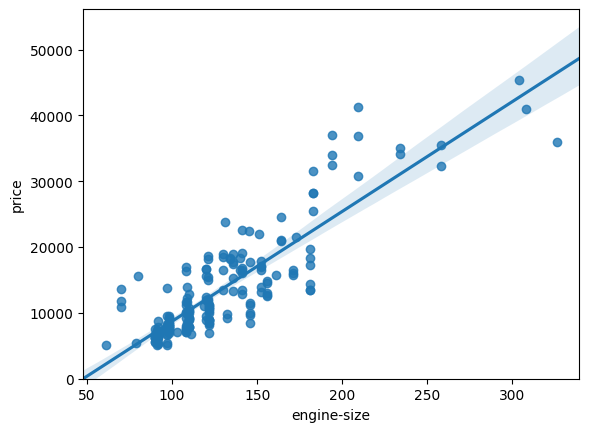

In [43]:
sns.regplot(x = "engine-size", y="price", data = Data)
plt.ylim(0,)

In [45]:
#examining the correlation
Data[["engine-size","price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


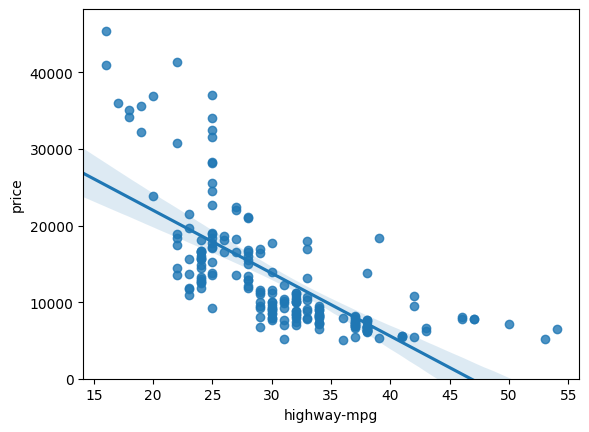

In [47]:
sns.regplot(x="highway-mpg", y="price", data=Data)
plt.ylim(0,)
Data[["highway-mpg","price"]].corr()

<h3> from our observation, engine-size and hoghway-mpg are potential predictor variable of price. Now we wil analyze the relationship between some  other variables and price using categorical variables </h3>

<AxesSubplot:xlabel='body-style', ylabel='price'>

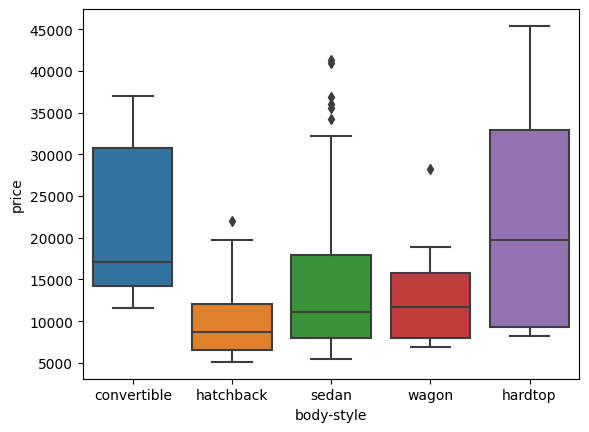

In [48]:
sns.boxplot(x="body-style", y="price", data=Data)

<AxesSubplot:xlabel='engine-location', ylabel='price'>

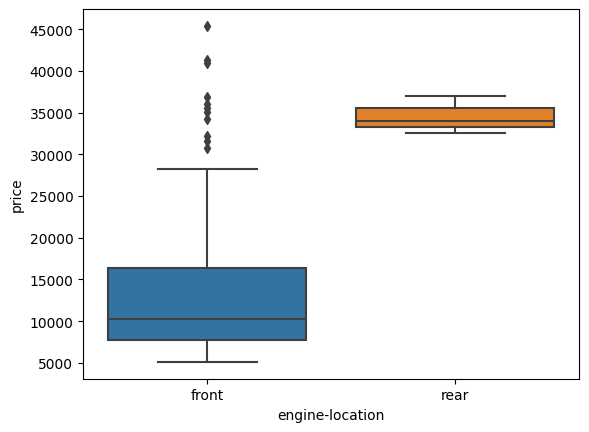

In [50]:
sns.boxplot(x="engine-location", y="price", data=Data)

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

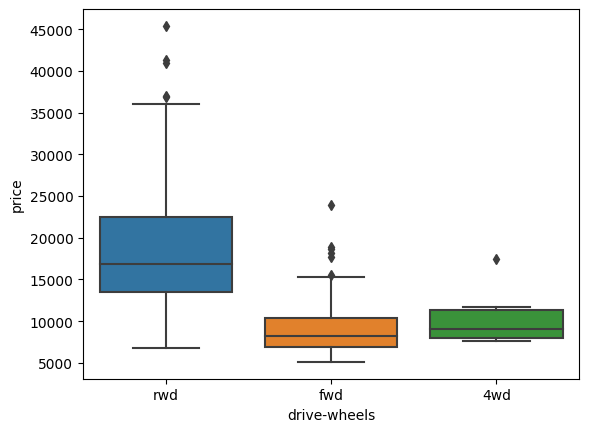

In [51]:
sns.boxplot(x="drive-wheels", y="price", data=Data)

From observation, engine-location and drive-wheels can be good potential  predictor of price, but body-style will be  a bad predictor of price

In [54]:
#mving to descriptive stastical analysis
Data.describe()


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,...,5117.665368,25.179104,30.686567,13207.129353,9.944145,8.044957,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,...,478.113805,6.423220,6.815150,7947.066342,2.534599,1.840739,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,...,4150.000000,13.000000,16.000000,5118.000000,4.795918,4.351852,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,...,4800.000000,19.000000,25.000000,7775.000000,7.833333,6.911765,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,...,5125.369458,24.000000,30.000000,10295.000000,9.791667,7.833333,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,...,5500.000000,30.000000,34.000000,16500.000000,12.368421,9.400000,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,...,6600.000000,49.000000,54.000000,45400.000000,18.076923,14.687500,1.000000,1.000000,1.000000,1.000000


In [55]:
Data.describe(include = object)


,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8
top,toyota,four,sedan,fwd,front,ohc,four,mpfi
freq,32,115,94,118,198,145,157,92


In [62]:
Data['drive-wheels'].value_counts().to_frame()
drive_wheels_counts = Data['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts


,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [63]:
engine_loc_counts = Data['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,198
rear,3


<p>After examining the value counts of the engine location, we see that engine location would not be a good predictor variable for the price. This is because we only have three cars with a rear engine and 198 with an engine in the front, so this result is skewed. Thus, we are not able to draw any conclusions about the engine location.</p>

In [65]:
#grouping Data  and performing analysis  based on individual  group
Data["drive-wheels"].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

<p>If we want to know, on average, which type of drive wheel is most valuable, we can group "drive-wheels" and then average them.</p>

<p>We can select the columns 'drive-wheels', 'body-style' and 'price', then assign it to the variable "group_one".</p>

In [68]:
group_one = Data[['drive-wheels','body-style','price']]
group_one = group_one.groupby(["drive-wheels"], as_index = False).mean()
group_one

C:\Users\moses\AppData\Local\Temp\ipykernel_8808\1454878253.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_one = group_one.groupby(["drive-wheels"], as_index = False).mean()


,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [69]:
group_two = Data[['drive-wheels','body-style','price']]
group_two= group_two.groupby(['drive-wheels','body-style'],as_index=False).mean()
group_two

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [72]:
#For better visualization
grouped_pivot = group_two.pivot(index='drive-wheels',columns='body-style')
#Fill the missing  values  with  0
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot


price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

<p>From our data, it seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.</p>

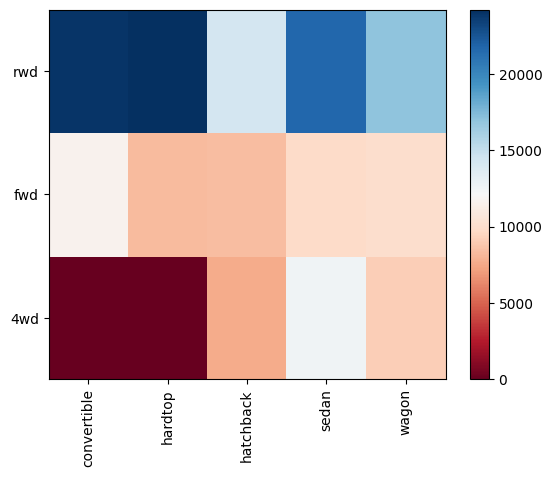

In [75]:
#visualising  relationship between body-style vs price using  heat map
#use the grouped results
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<p>Calculating pearson correlation value</p>

In [76]:
from scipy import stats

In [77]:
pearson_coef, p_value = stats.pearsonr(Data['wheel-base'], Data['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270733218e-20


<h4>Observation:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585).</p>


In [78]:
pearson_coef, p_value = stats.pearsonr(Data['horsepower'], Data['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value) 

The Pearson Correlation Coefficient is 0.8096068016571054  with a P-value of P =  6.273536270650504e-48


<h4>Observation:</h4>

<p>Since the p-value is $<$ 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1).</p>

In [79]:
pearson_coef, p_value = stats.pearsonr(Data['length'], Data['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is 0.6906283804483639  with a P-value of P =  8.016477466159328e-30


<h4>Observation:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).</p>


In [81]:
pearson_coef, p_value =  stats.pearsonr(Data["width"],Data["price"])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value )


The Pearson Correlation Coefficient is 0.7512653440522672  with a P-value of P = 9.20033551048217e-38


<h4>Observation:</h4>

<p>Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (\~0.751).</p>

In [82]:
pearson_coef, p_value = stats.pearsonr(Data['curb-weight'], Data['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8344145257702843  with a P-value of P =  2.189577238894065e-53


<h4>Observation:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).</p>


In [83]:
pearson_coef, p_value = stats.pearsonr(Data['engine-size'], Data['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723351674455182  with a P-value of P = 9.265491622200232e-64


<h4>Observation:</h4>

<p>Since the p-value is $<$ 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).</p>

In [84]:
pearson_coef, p_value = stats.pearsonr(Data['highway-mpg'], Data['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is -0.704692265058953  with a P-value of P =  1.7495471144476358e-31


<h4>Observation</h4>

<p>Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of about -0.705 shows that the relationship is negative and moderately strong.</p>


In [85]:
pearson_coef, p_value = stats.pearsonr(Data['city-mpg'], Data['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is -0.6865710067844678  with a P-value of P =  2.321132065567641e-29


<h4>Observation:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of about -0.687 shows that the relationship is negative and moderately strong.</p>

In [86]:
pearson_coef, p_value = stats.pearsonr(Data['bore'], Data['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.5431553832626603  with a P-value of P =   8.049189483935261e-17


<h4>Observation:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).</p>


<h2>Now we will use analysis of variance <b>ANOVA</b> to see significant difference between our groups</h2>

In [88]:
grouped_test2=group_two[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,4wd,7603.000000
1,4wd,12647.333333
3,fwd,11595.000000
4,fwd,8249.000000
8,rwd,23949.600000
9,rwd,24202.714286


In [89]:
grouped_test2.get_group('4wd')['price']

0     7603.000000
1    12647.333333
2     9095.750000
Name: price, dtype: float64

In [90]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 26.75473847377244 , P = 0.0008505298615827271


In [91]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 0.015958539708919313 , P = 0.9035999352040226


In [93]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'],grouped_test2.get_group('rwd')['price'])
print("ANOVA results: F =", f_val, "p =", p_val)

ANOVA results: F = 13.603994177561603 p = 0.010228629764546682


From the data, we observed that ANOVA for the categories `4wd` and `fwd` returns a high p-value > 0.1, therefore the calculated F-test score is not statistically significant. 

<h2>Developing linear and multiple regression models to evaluate our data</h2>

In [94]:
from sklearn.linear_model import LinearRegression

In [97]:
lm = LinearRegression()
X = Data[['highway-mpg']]
Y = Data['price']
lm.fit(X,Y)
Yhat=lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [101]:
#multiple linear regression
Z = Data[['engine-size', 'curb-weight', 'horsepower']]
lm.fit(Z, Data['price'])
print(lm.intercept_, lm.coef_)


-13777.92912050195 [83.85401973  4.40121218 49.30221602]


(0.0, 48270.60552922265)

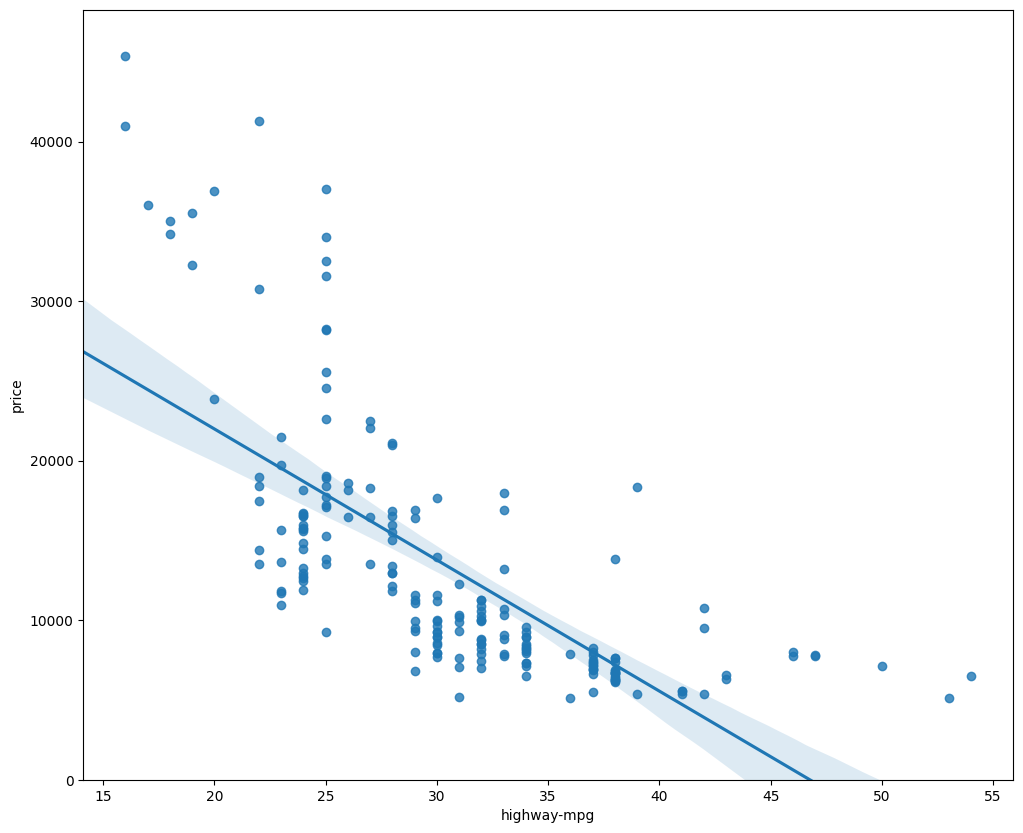

In [102]:
#using visualization
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=Data)
plt.ylim(0,)

(0.0, 47414.1)

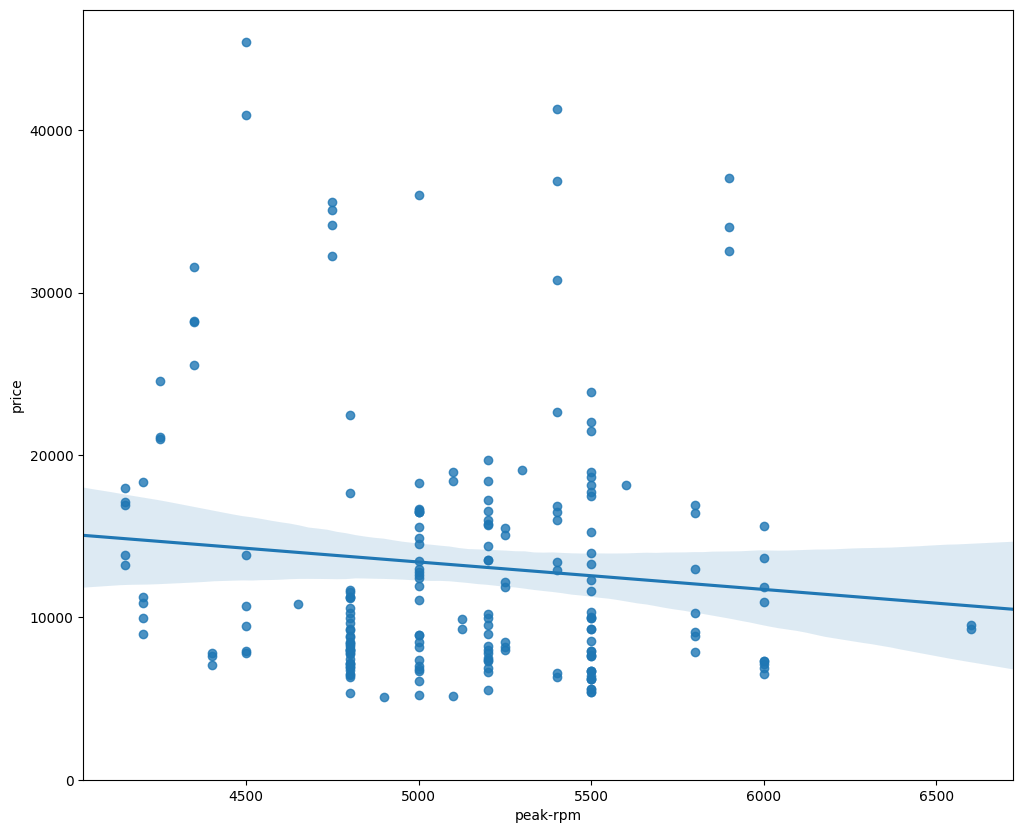

In [103]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=Data)
plt.ylim(0,)

From observation, highway-mpg has a more negative regression and can predict price than peak-rpm, we will view a residual plot to see if highway-mpg fits a linear or non-linear regression.

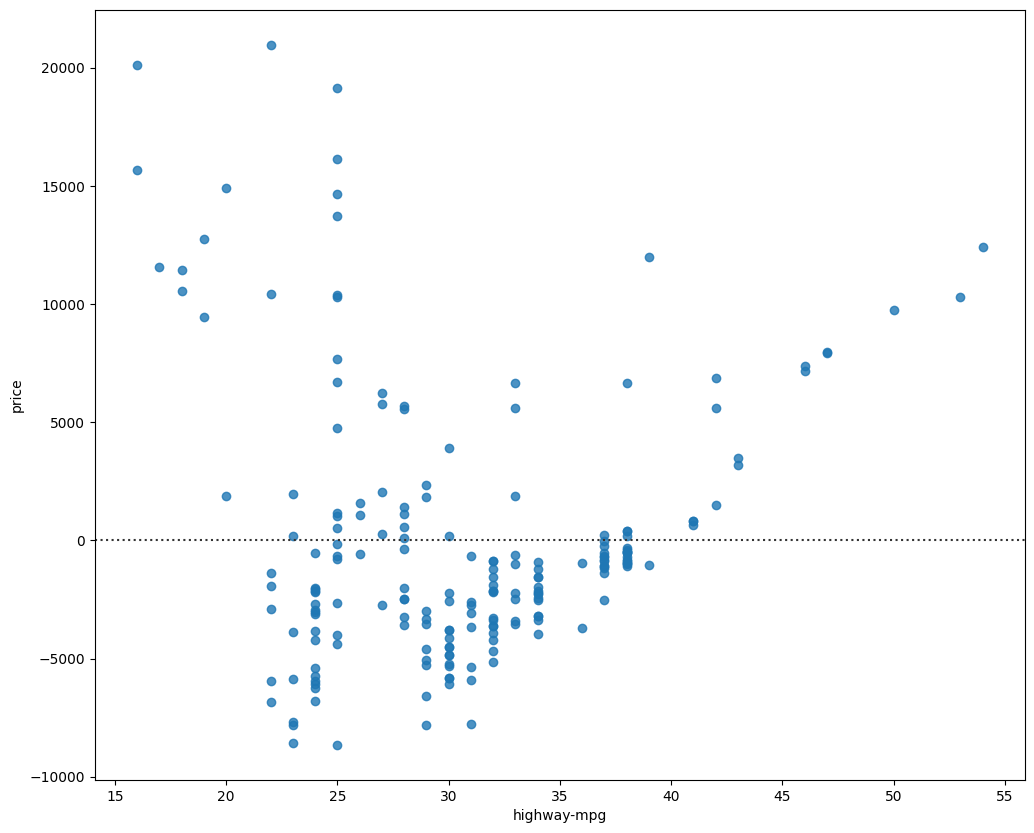

In [104]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=Data['highway-mpg'], y=Data['price'])
plt.show()

Due to the fact that the points are not randomly spread our around the x-axis, a non-linear model will best fit the data

<h2>In sample evaluations</h2>

In [107]:
from sklearn.metrics import mean_squared_error
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))
mse = mean_squared_error(Data['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The R-square is:  0.4965911884339176
The mean square error of price and predicted value is:  31635042.944639888


This shows that \~49.659% of the variation of the price is explained by this simple linear model "horsepower_fit"

In [111]:
# fit the model 
lm.fit(Z, Data['price'])
# Find the R^2
Y_predict_multifit = lm.predict(Z)
print('The R-square is: ', lm.score(Z,Data['price']))
print('The mean square error of price and predicted value using multifit is: ', mean_squared_error(Data['price'], Y_predict_multifit))

The R-square is:  0.809142046699173
The mean square error of price and predicted value using multifit is:  11993829.687276253


This showws that \~80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".


<h2>Training and testing</h2>

In [112]:
from sklearn.model_selection import train_test_split
y_data = Data['price']
x_data=Data.drop('price',axis=1)



x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 21
number of training samples: 180


Sometimes you do not have sufficient testing data; as a result, you may want to perform cross-validation. Let's go over several methods that you can use for cross-validation.

In [114]:
from sklearn.model_selection import cross_val_score
Rcross = cross_val_score(lm, x_data[['horsepower']], y_data, cv=4)
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.5220592359225417 and the standard deviation is 0.291304806661184


In [116]:
#We can use negative squared error as a score by setting the parameter  'scoring' metric to 'neg_mean_squared_error'.
-1 * cross_val_score(lm,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20251357.7835463 , 43743920.05390439, 12525158.34507633,
       17564549.69976652])

In [117]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

#prediction using test Data
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]



array([11349.68099115,  5884.25292475, 11208.31007475,  6641.03017109,
       15565.98722248])

In [118]:
#prediction using training Data
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.34910902, 28324.42490838, 14212.74872339,  4052.80810192,
       34499.8541269 ])